In [168]:
# imports

import numpy as np
import pandas as pd
import statsmodels.api as sm 

In [169]:
# injest data

auto_temp = pd.read_csv('./Auto.csv').dropna();
auto = auto_temp[auto_temp['horsepower'].str.isnumeric()].astype({ 'horsepower': 'int' })

In [170]:
# (a)

Y = auto['mpg']
X = pd.DataFrame({
                     'intercept': np.ones(auto.shape[0]),
                     'horsepower': auto['horsepower']
                  })

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           7.03e-81
Time:                        17:10:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a)
    i   - yes. F is large (600), and P>|t| is zero
    ii  - strong relationship strength is reflected by R-squared value of 0.606. 60.6% of changes predicted by the model
    iii - negative. horsepower coef -0.1578, means the regression line looks like \
    iv  - CODE SECTION BELOW
          mpg(98) = 24.47                                   (mean) 
          CI = [23.97, 24.96]                               (mean_ci_lower .. mean_ci_upper)
          prediction interval = [14.809396, 34.124758]      (obs_ci_lower .. obs_ci_upper)

In [171]:
# (a) - iv code

df_new = pd.DataFrame({ 
                            'intercept': [1], 
                            'horsepower': [98]
                       })

predictions = results.get_prediction(df_new)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


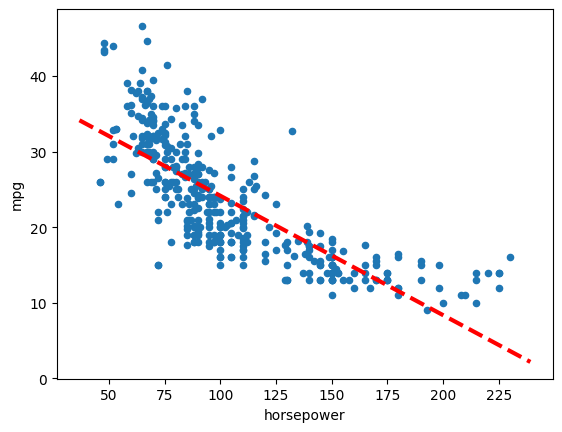

In [172]:
# (b)

def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = auto.plot.scatter('horsepower', 'mpg')

abline(ax, 39.9359, -0.1578, 'r--', linewidth=3)

(c)

Plot above - mpg of horsepower

Linear model does not perfectly fit the data - it has some curve.